In [28]:
import numpy as np
import pandas as pd
import scipy as sp
import glob
import os
import cv2
from PIL import Image
from scipy.sparse.linalg import eigs 
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [29]:
directory_path = 'D:\\Courses\\Fall 19\\ELEG 815 Statistical Learning\\Homeworks\\Homework3_Files(1)\\'
A = np.empty((25,38400),dtype=np.float64)

In [30]:
def Preprocess_Data(directory_path):
    for i,img_path in enumerate(glob.glob(directory_path+'/*.*')):
        image = cv2.imread(img_path,flags=0)
        image = cv2.resize(image,(160,240))
        image_pixels = image.flatten()
        A[i] = image_pixels

In [31]:
def Calculate_Average_Faces(A,j):                                               # j = row number in matrix A
    Sum_List = [sum(x) for x in zip(A[j],A[j+1],A[j+2],A[j+3],A[j+4])]          # use zip when adding 2 or more iterables
    n = 5
    avg_vector = [(Sum_List[i])/n for i in range(len(Sum_List))]
    return avg_vector

In [32]:
def Reconstruct_Image_from_Pixels(avg_list,height,width):
    return np.reshape(avg_list,(height,width))

In [33]:
Preprocess_Data(directory_path)

In [34]:
Anne = Calculate_Average_Faces(A,0)
Benjamin = Calculate_Average_Faces(A,5)
Keanu = Calculate_Average_Faces(A,10)
Markle = Calculate_Average_Faces(A,15)
Ryan = Calculate_Average_Faces(A,20)

Avg_Array_Anne = Reconstruct_Image_from_Pixels(Anne,240,160)
Avg_Array_Benjamin = Reconstruct_Image_from_Pixels(Benjamin,240,160)
Avg_Array_Keanu = Reconstruct_Image_from_Pixels(Keanu,240,160)
Avg_Array_Markle = Reconstruct_Image_from_Pixels(Markle,240,160)
Avg_Array_Ryan = Reconstruct_Image_from_Pixels(Ryan,240,160)

In [35]:
Avg_Image_Anne = Image.fromarray(Avg_Array_Anne)
Avg_Image_Benjamin = Image.fromarray(Avg_Array_Benjamin)
Avg_Image_Keanu = Image.fromarray(Avg_Array_Keanu)
Avg_Image_Markle = Image.fromarray(Avg_Array_Markle)
Avg_Image_Ryan = Image.fromarray(Avg_Array_Ryan)

In [36]:
Avg_Image_Anne.show()
Avg_Image_Benjamin.show()
Avg_Image_Keanu.show()
Avg_Image_Markle.show()
Avg_Image_Ryan.show()

In [37]:
#dataFrame = pd.DataFrame(A)
#corr = dataFrame.corr()
#print(corr.shape)

In [38]:

#corr_as_array = np.array(corr)
#print(corr_as_array.shape)

In [39]:
# Eigen decomposition
#W,V = eigs(corr_as_array,k=20)

In [40]:
# Eigen Values
W = np.genfromtxt('D:\\Courses\\Fall 19\\ELEG 815 Statistical Learning\\Homeworks\\HW3\\Vals1.csv',delimiter=',')

# Eigen Vectors
V = np.genfromtxt('D:\\Courses\\Fall 19\\ELEG 815 Statistical Learning\\Homeworks\\HW3\\Vecs1.csv',delimiter=',')
#W = np.real(W)
#Q = np.real(V)
print(W.shape)
print(V.shape)

(20,)
(38400, 20)


In [41]:
W_diagnol = np.diag(W,k=0)


In [42]:
eigen_vector_1 = Reconstruct_Image_from_Pixels(V[:,0],240,160)


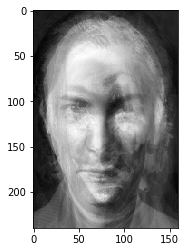

In [43]:
imgplot_vector_1 = plt.imshow(eigen_vector_1,cmap='gray')

In [44]:
eigen_vector_2 = Reconstruct_Image_from_Pixels(V[:,1],240,160)

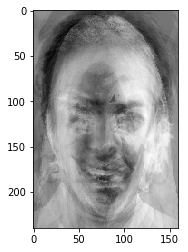

In [45]:
imgplot_vector_2 = plt.imshow(eigen_vector_2,cmap='gray')

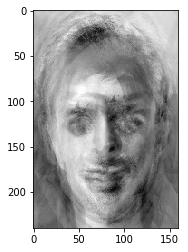

In [46]:
eigen_vector_3 = Reconstruct_Image_from_Pixels(V[:,2],240,160)
imgplot_vector_3 = plt.imshow(eigen_vector_3,cmap='gray')

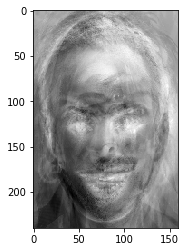

In [47]:
eigen_vector_4 = Reconstruct_Image_from_Pixels(V[:,3],240,160)
imgplot_vector_4 = plt.imshow(eigen_vector_4,cmap='gray')

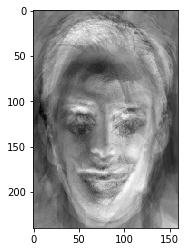

In [48]:
eigen_vector_5 = Reconstruct_Image_from_Pixels(V[:,4],240,160)
imgplot_vector_5 = plt.imshow(eigen_vector_5,cmap='gray')

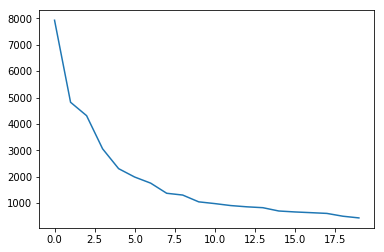

In [49]:
plt.plot(W)


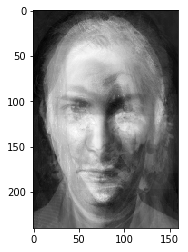

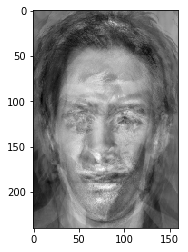

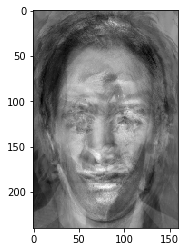

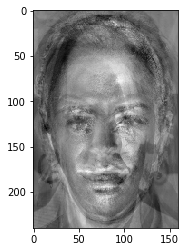

In [100]:
w = [None]*20
k=5
Image_A_i_T = np.empty((38400,),dtype=np.float64)
for j in range(0,20,5):
    v_j_T = V[:,j].T
    A_i_T = A[0].T
    w[j] = np.dot(v_j_T,A_i_T)
    Image_A_i_T += np.dot(w[j],V[:,j])
    reshaped_Img = Image_A_i_T.reshape(240,160)
    plt.figure(j)
    plt.imshow(reshaped_Img,cmap='gray')


In [51]:
a_i = Avg_Array_Anne.flatten()
p_ai = np.dot(a_i,V)           # Average Projection (project average face of Anne Hathway on Reduced eigen vector space)
print(p_ai.shape)              # Shape will be 1 X 20

(20,)


<BarContainer object of 20 artists>

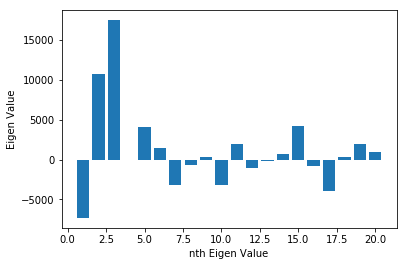

In [105]:
# Average face projection of Anne Hathway on Reduced Eigen Value space

index = np.arange(1,21,1,dtype=int)
plt.xlabel('nth Eigen Value')
plt.ylabel('Eigen Value')
plt.bar(index,p_ai)                 

In [53]:
mypic = cv2.imread('D:\\Courses\\Fall 19\\ELEG 815 Statistical Learning\\Homeworks\\HW3\\mypic.jpg',flags=0)
mypic_resized = cv2.resize(mypic,(160,240))
x = mypic_resized.flatten()

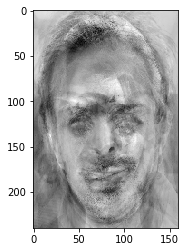

In [62]:
# Projection of my image on reduced eigen vector space
p = np.dot(x,V)

# Reconstruct back my image from this projection on reduced eigne vector space i.e x_hat = V.p_transpose
x_hat = np.dot(V,p.T)
x_hat = x_hat.reshape((240,160))
x_hat_flattened = x_hat.flatten()

# My Reconstructed image 
plt.imshow(x_hat,cmap='gray')



<BarContainer object of 20 artists>

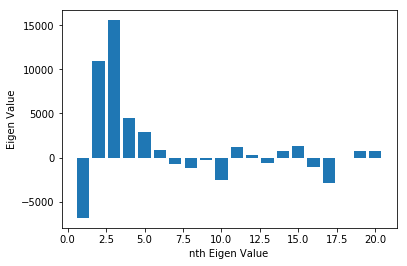

In [104]:
# My image's signature on top 20 eigen vectors

index = np.arange(1,21,1,dtype=int)
plt.xlabel('nth Eigen Value')
plt.ylabel('Eigen Value')
plt.bar(index,p)

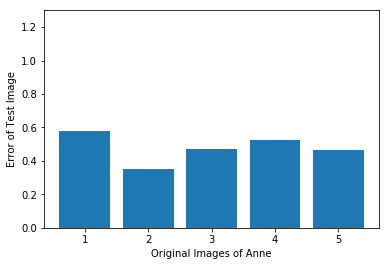

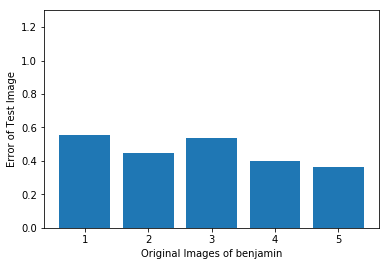

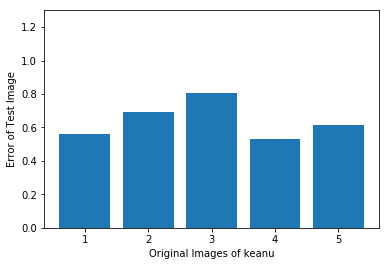

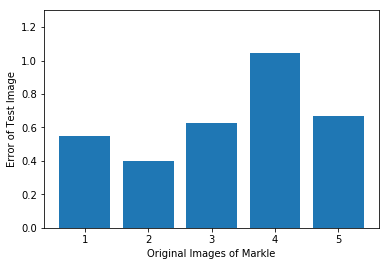

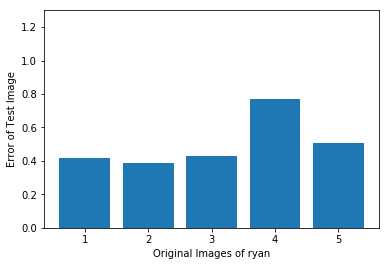

In [114]:
Err = [None]*25
for i,img_path in enumerate(glob.glob(directory_path+'/*.*')):
    
    # Original Image Projection of each image (celebrity which is being tested) in database
    
    img = cv2.imread(img_path,flags=0)
    img = cv2.resize(img,(160,240))
    img_pixels = img.flatten()
    o_jV = np.dot(img_pixels,V)
    xV = p
    difference_between_projections = o_jV - xV
    l2_norm_difference = np.linalg.norm(difference_between_projections)
    l2_norm_original_image = np.linalg.norm(o_jV)
    Err[i] = l2_norm_difference/l2_norm_original_image
    if (i+1)%5==0:
        
        # 1 figure will be created for each i inside the if loop
        plt.figure(i)
        
        # My image's projection error as compared to each of the 5 original images of Anne Hathway    
        x_axis = np.arange(1,6,1,dtype=int)
        plt.ylim((0,1.3))
        plt.ylabel('Error of Test Image')
        name = os.path.split(img_path)[1]
        imgname = name[0:-5]
        plt.xlabel('Original Images of '+imgname)
        arr = Err[i-4:i+1]
        plt.bar(x_axis,arr)
        Err = [None]*25


In [ ]:
# Q3, part 4 Ans = My image seems to be most similar to Ryan, because average error is less than 0.5, except in one case of image 4 which can be due to number of other reasons.